In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
from support.omniwheel_calculation_pd import *
from support.pd_support import *
from support.calculations_support import *
from support.ar_calculations import *
from support.imu_calculations import *
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np
from sympy import Symbol
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
# from support.omniwheel_calculation import *
import sympy as sp

In [2]:
w1 = np.zeros(10000)
w2 = np.arange(0, 10000, 1)
w3 = np.arange(0, 10000, 1)

temp = np.full(10000, 10000)
w1 = np.append(w1, w2)
w2 = np.append(w2, temp)
w3 = np.append(w3, temp)

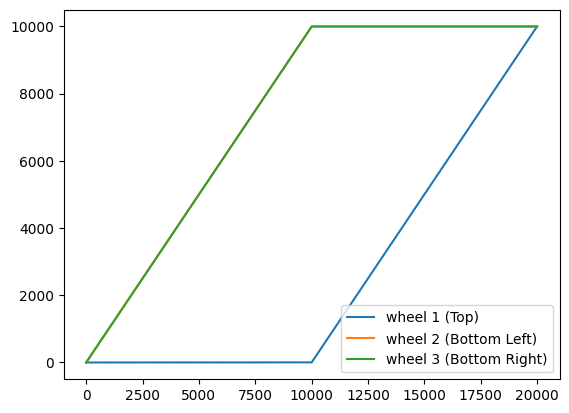

In [3]:
plt.plot(w1, label='wheel 1 (Top)')
plt.plot(w2, label='wheel 2 (Bottom Left)')
plt.plot(w3, label='wheel 3 (Bottom Right)')
plt.legend()

In [51]:
w1 = np.zeros(100)
w2 = np.zeros(100)
w3 = np.arange(0, 100, 1)
w3 = np.random.randint(0, 50, 100)
# w3

In [52]:
y = 1
x = 1
mat = np.array([[-y, 1, 0], [-x, 0, -1], [-x, 0, 1]])
pmat = np.linalg.pinv(mat)


In [53]:
df = pd.DataFrame([w1, w2, w3], index=['e_t', 'e_rr', 'e_rl']).T
df["e_rr"] = -df["e_rr"]
df["e_rl"] = -df["e_rl"]
df["e_t"] = df["e_t"]

In [54]:
df = set_zero(df)
df, ang_col = get_angular_velocity(df)
df, vel_col = get_directional_velocity(df, ang_col, 1, x, y)
df, pos_col = get_position(df)
df.rename(columns={"e_t_av": "u1", "e_rr_av": "u2", "e_rl_av": "u3"}, inplace=True)
df

,e_t,e_rr,e_rl,u1,u2,u3,w,vx,vy,x_val,y_val
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,20.0,0.0,0.0,3.141593,1.570796,1.570796,-1.570796,0.007854,-0.007854
2,0.0,0.0,28.0,0.0,0.0,1.256637,0.628319,0.628319,-0.628319,0.018850,-0.018850
3,0.0,0.0,28.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.021991,-0.021991
4,0.0,0.0,-9.0,0.0,0.0,-5.811946,-2.905973,-2.905973,2.905973,0.007461,-0.007461
...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,-15.0,0.0,0.0,-6.597345,-3.298672,-3.298672,3.298672,0.004712,-0.004712
96,0.0,0.0,23.0,0.0,0.0,5.969026,2.984513,2.984513,-2.984513,0.003142,-0.003142
97,0.0,0.0,-7.0,0.0,0.0,-4.712389,-2.356194,-2.356194,2.356194,0.006283,-0.006283
98,0.0,0.0,31.0,0.0,0.0,5.969026,2.984513,2.984513,-2.984513,0.009425,-0.009425


In [55]:
# df, col_names = get_position(df)

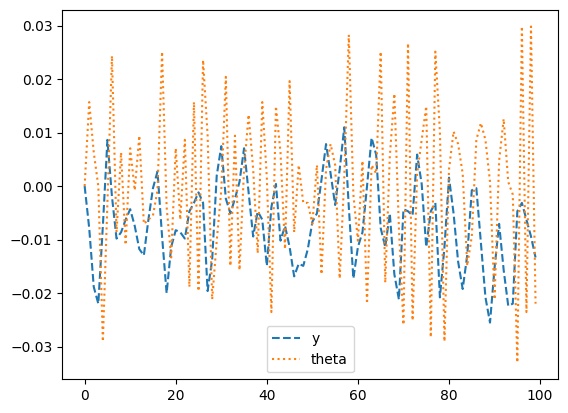

In [81]:
# dotted line is the actual path
# plt.plot(df["x_val"], label="x", linestyle="--")
plt.plot(df["y_val"], label="y", linestyle="--")
plt.plot(df["w"]/100, label="theta", linestyle=":")
plt.legend()

In [57]:
x = Symbol('x')
y = Symbol('y')

w = Symbol('w')
vx = Symbol('v_x')
vy = Symbol('v_y')

mat = sp.Matrix([[-y, 1, 0], [-x, 0, -1], [x, 0, -1]])
# vb = sp.Matrix([df["e_t_av"][500], df["e_rr_av"][500], df["e_rl_av"][500]]).reshape(3,1)
vb = sp.Matrix([w, vx, vy]).reshape(3,1)

In [58]:
mat

Matrix([
[-y, 1,  0],
[-x, 0, -1],
[ x, 0, -1]])

In [82]:
sp.Matrix(mat) * sp.Matrix(vb)

Matrix([
[ 2.19911485751285*y - 2.19911485751286],
[ 2.19911485751285*x - 2.19911485751286],
[-2.19911485751285*x - 2.19911485751286]])

In [64]:
# x = 1
# y = 1

x = Symbol('x')
y = Symbol('y')

w = 0
vx = 0
vy = 1.0

u1 = 1
u2 = 1
u3 = 1

mat = sp.Matrix([[-y, 1.0, 0.0], [-x, 0.0, -1.0], [x, 0.0, -1.0]])

wheel_placement = {"x":[], "y":[]}

for i in range(len(df)):

    vb = sp.Matrix([df["w"][i], df["vx"][i], df["vy"][i]]).reshape(3,1)
    matmul = sp.Matrix(mat) * sp.Matrix(vb)

    _y = sp.solvers.solvers.solve(matmul[0], y, simplify=False, rational=False)
    _x1 = sp.solvers.solvers.solve(matmul[1], x, simplify=False, rational=False)
    _x2 = sp.solvers.solvers.solve(matmul[2], x, simplify=False, rational=False)

    if not (len(_y) == 0):
        wheel_placement["y"].append(_y[0])

    if not (len(_x1) == 0):
        wheel_placement["x"].append(_x2[0])

In [65]:
# sp.solvers.solvers.solve(val[0], y)
# sp.solvers.solvers.solve(val[1], x)
# sp.solvers.solvers.solve(val[2], x)

wheel_placement = pd.DataFrame(wheel_placement)
wheel_placement.tail(20)

,x,y
78,-1.00000000000000,1.00000000000000
79,-1.00000000000000,1.00000000000000
80,-1.00000000000000,1.00000000000000
81,-1.00000000000000,1.00000000000000
82,-1.00000000000000,1.00000000000000
83,-1.00000000000000,1.00000000000000
84,-1.00000000000000,1.00000000000000
85,-1.00000000000000,1.00000000000000
86,-1.00000000000000,1.00000000000000
87,-1.00000000000000,1.00000000000000


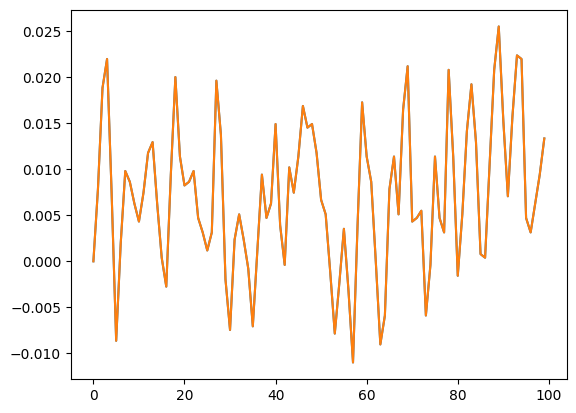

In [100]:
plt.plot(df["x_val"])
plt.plot(-df["y_val"])

In [98]:
_mat = mat.inv()

_mat * sp.Matrix(df[["u1", "u2", "u3"]].iloc[50].values.reshape(3,1))

Matrix([
[  -0.706858347057703/x],
[-0.706858347057703*y/x],
[     0.706858347057703]])

In [85]:
df[["u1", "u2", "u3"]].iloc[50].values.reshape(3,1)

array([[ 0.        ],
       [ 0.        ],
       [-1.41371669]])

In [87]:
sp.Matrix(df[["u1", "u2", "u3"]].iloc[50].values.reshape(3,1))

Matrix([
[                0],
[                0],
[-1.41371669411541]])

Matrix([
[  0,   -0.5/x,   0.5/x],
[1.0, -0.5*y/x, 0.5*y/x],
[  0,     -0.5,    -0.5]])